In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("fraud_dataset.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [4]:
data.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

In [9]:
fraud = len(data[data['Fraud_Risk'] == 1])
non_fraud = len(data[data['Fraud_Risk'] == 0])
pct_nf = round((non_fraud / (non_fraud + fraud)) * 100, 2)
pct_f = round((fraud / (non_fraud + fraud)) * 100, 2)
print("Fraud Risk", pct_f)

Fraud Risk 57.68


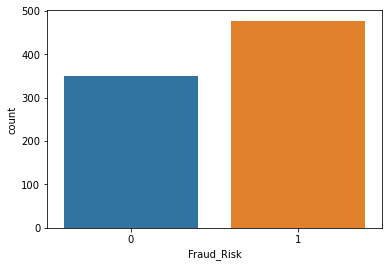

In [24]:
sns.countplot(x='Fraud_Risk',data=data)
plt.show()

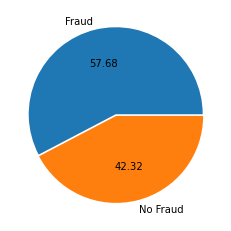

In [20]:
plt.pie(x=[pct_f, pct_nf], labels=["Fraud", "No Fraud"], explode=[0.01, 0.01], autopct='%.2f')
plt.show()

Create correlation heatmap

To visualise the correlations between all variables, not just the target variable, we can create a correlation matrix. This is essentially the same as the dataframe above, but with a row for each variable, and a neat colour coding scheme that allows you to see which values are most positively or negatively correlated based on the depth of their colour. Pale cells denote values with a negative correlation, while dark cells denote a stronger positive correlation.

In [109]:
data.corr()['Fraud_Risk']

Gender                      0.309570
Married                     0.825064
Dependents                  0.315421
Education                  -0.037406
Self_Employed               0.688170
ApplicantIncome             0.066347
CoapplicantIncome           0.120304
LoanAmount                  0.164087
Loan_Term                  -0.097339
Credit_History_Available   -0.239512
Housing                    -0.082534
Locality                   -0.030530
Fraud_Risk                  1.000000
Name: Fraud_Risk, dtype: float64

<AxesSubplot:>

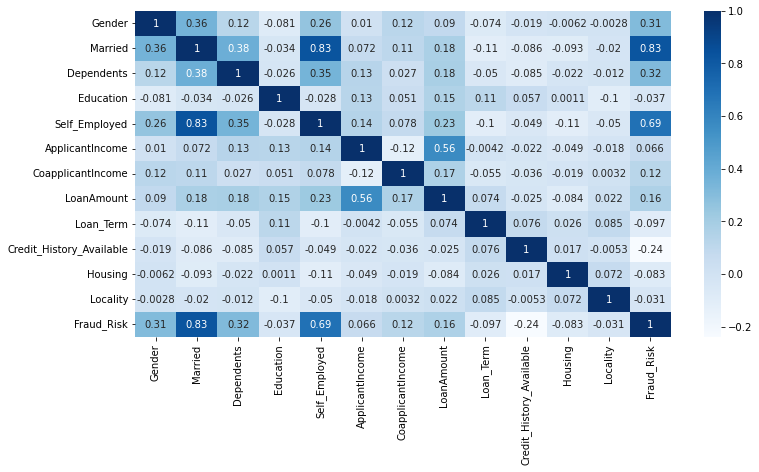

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True, cmap="Blues")

In [27]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [28]:
print(x.shape)
print(y.shape)

(827, 12)
(827,)


In [29]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train)

array([[ 0.61334369,  1.06066017,  0.3784831 , ...,  0.35903517,
        -1.33875708, -1.26916342],
       [-1.63040726,  1.06066017, -0.69916828, ...,  0.35903517,
         0.7469615 ,  0.03150406],
       [ 0.61334369,  1.06066017,  1.45613447, ...,  0.35903517,
        -1.33875708, -1.26916342],
       ...,
       [-1.63040726,  1.06066017,  1.45613447, ...,  0.35903517,
        -1.33875708,  0.03150406],
       [-1.63040726, -0.94280904,  0.3784831 , ...,  0.35903517,
         0.7469615 ,  1.33217153],
       [-1.63040726, -0.94280904, -0.69916828, ...,  0.35903517,
         0.7469615 ,  1.33217153]])

In [31]:
#applying svc
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [32]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [33]:
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.6608996539792388
0.6385542168674698


In [34]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [36]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.7958477508650519
0.6586345381526104


In [37]:
##decision tree##

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [39]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

1.0
0.9196787148594378


In [40]:
##randomforest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [42]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

1.0
0.9518072289156626


In [46]:
# Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [48]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.8823529411764706
0.8995983935742972


In [49]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest'],
    'Scores_test': [Score_LR_test*100,Score_SVC_test*100,Score_KNN_test*100,Score_DT_test*100,Score_RFC_test*100],
    'Scores_train': [Score_LR_train*100,Score_SVC_train*100,Score_KNN_train*100,Score_DT_train*100,Score_RFC_train*100]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,89.959839,88.235294
1,SVM,63.855422,66.089965
2,KNN,65.863454,79.584775
3,Decision Tree,91.967871,100.000000
4,Random Forest,95.180723,100.000000


In [50]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,Random Forest,95.180723,100.000000
1,Decision Tree,91.967871,100.000000
2,Logistic Regression,89.959839,88.235294
3,KNN,65.863454,79.584775
4,SVM,63.855422,66.089965


In [52]:
##conclusion##
#Based on above results we can say that Random Forest gives the best score. Hence we will use that.
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       105
           1       0.99      0.93      0.96       144

    accuracy                           0.95       249
   macro avg       0.95      0.96      0.95       249
weighted avg       0.95      0.95      0.95       249



In [54]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,y_test_pred)
conf_matix

array([[103,   2],
       [ 10, 134]], dtype=int64)